# Result

Random Search            best Score: 0.9994 with 100 iterations
Bayesian Optimization GP best Score: 0.9998 with 86 iterations
Bayesian Optimization RF best Score: 0.9998 with 100 iterations


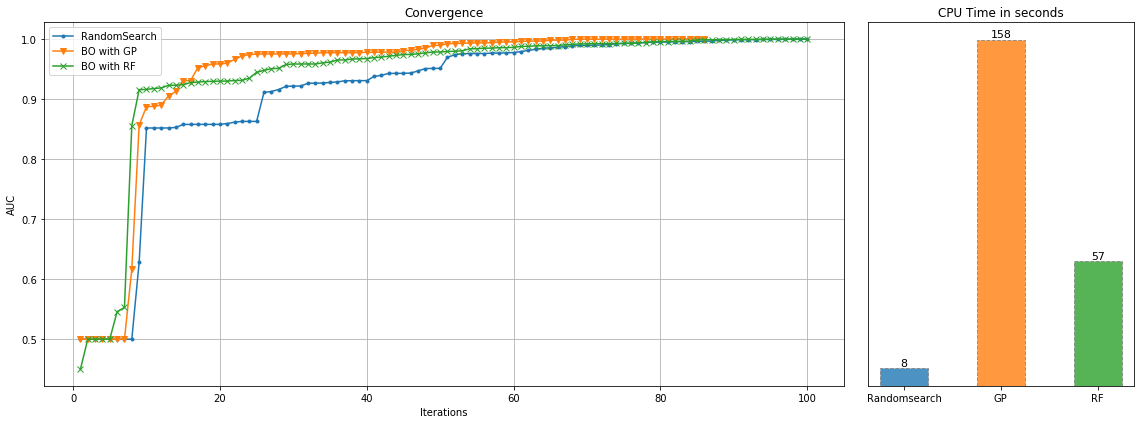

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from util import dump_result,load_result

RM_results_50 =load_result("dataset_3_kr-vs-kp_randomsearch2models_5f_50.json")
BO_results_50 = load_result("dataset_3_kr-vs-kp_parallel2models_np_5f_50_eips.json")
rm_50_score_summary= load_result("dataset_3_kr-vs-kp_rm_50_score_summary2models_5f_50.json")

plt.rcParams["figure.figsize"] = (16, 6)
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

#rm_lgb = sorted(RM_results_50["LGBMClassifier"]["all_cv_results"])
rm=sorted(rm_50_score_summary["mean_score"])
bo_GP = sorted(BO_results_50["GP"]["all_cv_results"])
bo_RF = sorted(BO_results_50["RF"]["all_cv_results"])

ax0 = plt.subplot(gs[0])
ax0.plot(range(1,len(rm)+1),rm,label="RandomSearch",marker=".", markersize=6)

ax0.plot(range(1,len(BO_results_50["GP"]['all_cv_results'])+1),bo_GP,label="BO with GP",marker="v", markersize=6)
ax0.plot(range(1,len(BO_results_50["RF"]['all_cv_results'])+1),bo_RF,label="BO with RF",marker="x", markersize=6)
    
ax0.set_xlabel('Iterations')
ax0.set_ylabel('AUC')
ax0.set_title('Convergence')
ax0.legend()
ax0.grid()

ax1 = plt.subplot(gs[1])
rm_time = RM_results_50["LGBMClassifier"]["CPU_Time"]+RM_results_50["SVC"]["CPU_Time"]
ax1.bar("Randomsearch", rm_time, label="Randomsearch", width=0.5, alpha=0.8, ec='grey', ls="--")
ax1.axes.get_yaxis().set_visible(False)
ax1.text("Randomsearch", rm_time + 0.05, '%.0f' % rm_time, ha='center', va='bottom', fontsize=11)
print( "Random Search           "+' best Score:', round(RM_results_50["LGBMClassifier"]['best_score'], 4), 'with', len(rm), 'iterations')
for i  in BO_results_50.keys():
    time = BO_results_50[i]['CPU_Time']
    ax1.bar(i, time, label=i, width=0.5, alpha=0.8, ec='grey', ls="--")
    ax1.axes.get_yaxis().set_visible(False)
    ax1.set_title('CPU Time in seconds')
    ax1.text(i, time + 0.05, '%.0f' % time, ha='center', va='bottom', fontsize=11)
    print( "Bayesian Optimization "+i+' best Score:', round(BO_results_50[i]['best_score'], 4), 'with', len(BO_results_50[i]['all_cv_results']), 'iterations')
plt.tight_layout()

# Preparing data

In [4]:
import numpy as np
import base64
import os
from os.path import join
import sys

def mprint(msg):
    from datetime import datetime
    """info"""
    cur_time = datetime.now().strftime('%m-%d %H:%M:%S')
    print(f"INFO  [{cur_time}] {msg}")

def Config_DIRS():

    if len(sys.argv) == 1:
        # default local
        ROOT_DIR = os.getcwd()
        DIRS = {
            'input': join(ROOT_DIR, 'data'),
            'output': join(ROOT_DIR, 'predictions'),
            'program': join(ROOT_DIR, 'ingestion_program'),
            'submission': join(ROOT_DIR, 'automl')
        }
    elif len(sys.argv) == 3:
        # default local
        ROOT_DIR = os.getcwd()
        DIRS = {
            'input': join(ROOT_DIR, 'data'),
            'output': join(ROOT_DIR, 'predictions'),
            'program': join(ROOT_DIR, 'ingestion_program'),
            'submission': join(ROOT_DIR, 'automl')
        }

    elif len(sys.argv) == 5:
        # run in codalab
        DIRS = {
            'input': sys.argv[1],
            'output': sys.argv[2],
            'program': sys.argv[3],
            'submission': sys.argv[4]
        }
    elif len(sys.argv) == 6 and sys.argv[1] == 'local':
        # full call in local
        DIRS = {
            'input': sys.argv[2],
            'output': sys.argv[3],
            'program': sys.argv[4],
            'submission': sys.argv[5]
        }
    else:
        raise ValueError("Wrong number of arguments")
    sys.path.append(DIRS['submission'])
    print(DIRS)
    return(DIRS)

DIRS = Config_DIRS()

import reader

info = {
	"table_sep" : ',',
	"target_name" : 'class',
	"miss_values":'?'
}


datanames = [f for f in os.listdir(DIRS['input']) if not f.startswith('.')]
reader = reader.Reader(sep = info['table_sep'],
						miss_values=info['miss_values']
						)

for dataname in datanames:
        mprint(f'Read data: {dataname}')
        datapath = join(DIRS['input'], dataname)

data = reader.read_split([datapath], target_name=info['target_name'])
print(data.keys())



{'input': '/Users/caicai/Desktop/Masterarbeit/AutoML/Automl_Framework/data', 'output': '/Users/caicai/Desktop/Masterarbeit/AutoML/Automl_Framework/predictions', 'program': '/Users/caicai/Desktop/Masterarbeit/AutoML/Automl_Framework/ingestion_program', 'submission': '/Users/caicai/Desktop/Masterarbeit/AutoML/Automl_Framework/automl'}
INFO  [08-04 11:49:18] Read data: dataset_3_kr-vs-kp.csv

----Start [read_split]:
--------Start [pre_clean]:

reading csv : dataset_3_kr-vs-kp.csv ...
cleaning data ...
--------End   [pre_clean]. Time elapsed: 0.62 sec.

> Number of common features : 36

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> You have no missing values on train set...

dropping columns with high missing rate >0.8...
> No need to dropping!

> Number of categorical features: 35
> Number of numerical features: 0
> Number of training samples : 2141
> Nu

/Users/caicai/Desktop/Masterarbeit/AutoML/Automl_Framework/automl/reader.py:314: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[path] = train[~is_null].drop(target_name, axis=1)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Random Search

In [19]:
# Importing core libraries
import time
import pprint
import joblib
import pandas as pd

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

# Model selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args  # decorator to convert a list of parameters to named arguments
from skopt.callbacks import DeadlineStopper  # Stop the optimization before running out of a fixed budget of time.
from skopt.callbacks import VerboseCallback  # Callback to control the verbosity
from skopt.callbacks import DeltaXStopper  # Stop the optimization If the last two positions at which the objective has been evaluated are less than delta

# import local function
from util import log, timeit, mprint, dump_result, load_result
from encoder import Categorical_encoder
from scaling import Scaler
from model import Classifier
from feature_selection import feature_selector


class RandomOptimiser():

    def __init__(self,  models, params,
                 scoring=None,
                 n_folds=5,
                 random_state=42,
                 verbose=True,
                 to_path="save",
                 perform_scaling=True,
                 parallel_strategy=True):

        self.scoring = scoring
        self.n_folds = n_folds
        self.random_state = random_state
        self.verbose = verbose
        self.to_path = to_path
        self.perform_scaling = perform_scaling
        self.parallel_strategy = parallel_strategy
        self.time_cost_CPU = None

        if self.to_path is True:
            warnings.warn("Optimiser will save all your fitted models result ")

    
        # Default scoring for classification
        if (self.scoring is None):
            self.scoring = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)

        elif (self.scoring == "log_loss"):
            self.scoring = 'log_loss'

        else:
            if (type(self.scoring) == str):
                if (self.scoring in ["accuracy", "roc_auc", "f1",
                                     "log_loss", "precision", "recall"]):
                    pass
                else:
                    warnings.warn("Invalid scoring metric. "
                                  "auc is used instead.")
                    self.scoring is None
            else:
                pass
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.random_searches = {}

    def fit(self, df_train, df_target, n_jobs=-1, verbose=0, n_iter=10):
        tuning_result = {}
        ce = Categorical_encoder()
        X = ce.fit_transform(df_train, df_target)
        
        if self.perform_scaling is True:
            scal = Scaler()
            X = scal.fit_transform(X, df_target)
        
        for key in self.keys:
            print("Running RandomSearchCV for %s." % key)
            start = time.time()
            start_cpu = time.process_time()
            model = self.models[key]
            params = self.params[key]
            rs = RandomizedSearchCV(model, params, cv= self.n_folds, n_jobs=n_jobs, n_iter=n_iter, 
                              verbose=verbose, scoring=self.scoring, refit=True,
                              return_train_score=True)
            rs.fit(X,y)
            self.random_searches[key] = rs
            self.time_cost_CPU = time.process_time() - start_cpu
            time_cost = time.time() - start
            result = {}
            result['best_score'] = rs.best_score_
            result['best_score_std'] = rs.cv_results_['std_test_score'][rs.best_index_]
            result['best_parmas'] = rs.best_params_
            result['params'] = rs.cv_results_['params']
            result['CPU_Time'] = round(self.time_cost_CPU, 0)
            result['Time_cost'] = round(time_cost, 0)
            result['all_cv_results'] = rs.cv_results_['mean_test_score'][:]
            result['CV'] = rs.cv_results_
            #        print('>' + title + ':')
            time_cost_CPU = round(result['CPU_Time'], 0)
            time_cost = round(result['Time_cost'], 0)
            cand = len(result['all_cv_results'])
            best_cv = round(result['best_score'], 8)
            best_cv_sd = round(result['best_score_std'], 4)
            print(f'took CPU Time: {time_cost_CPU}s, candidates checked:{cand} ,best CV score: {best_cv} \u00B1 {best_cv_sd}')
            print("")
            tuning_result[key] = result
        return  tuning_result
         

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.random_searches:
            print(k)
            params = self.random_searches[k].cv_results_['params']
            scores = []
            for i in range(self.random_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.random_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]
    

    def get_params(self, deep=True):

        return {'scoring': self.scoring,
                'n_folds': self.n_folds,
                'random_state': self.random_state,
                'verbose': self.verbose,
                'save_result': self.save_result,
                'perform_scaling': self.perform_scaling,
                'parallel_strategy': self.parallel_strategy}

    def set_params(self, **params):

        self.__fitOK = False

        for k, v in params.items():
            if k not in self.get_params():
                warnings.warn("Invalid parameter a for optimiser Optimiser. "
                              "Parameter IGNORED. Check the list of available "
                              "parameters with `optimiser.get_params().keys()`")
            else:
                setattr(self, k, v)



# Bayesian Optimization

In [21]:
import pandas as pd
from util import dump_result,load_result
import lightgbm as lgb
from sklearn.svm import SVC
df_train = data['train'] #df_test = data['test']
y = data['target'] #y_test = data['y_test']

models = {
    'LGBMClassifier': lgb.LGBMClassifier(objective='binary', seed=0),
    'SVC':SVC(max_iter=1000,random_state=0)
}

params = {
    'LGBMClassifier': {'is_unbalance':[True, False],
                     'learning_rate':[0.01,1] ,
                     'boosting_type': ['gbdt', 'dart'],
                     'n_estimators': [10, 500],
                     'max_bin': [100, 10000],
                     'feature_fraction': [0.01,1.0],
                     'reg_alpha': Real(low=1e-09, high=1000, prior='log-uniform', name="model__reg_alpha"),
                     'reg_lambda': Real(low=1e-09, high=1000, prior='log-uniform', name="model__reg_alpha")},
    'SVC': {
            "class_weight": ['balanced',None],
            'C': Real(1e-6, 1e+6, 'log-uniform', name="model__C"),  
            'gamma': Real(1e-6, 1e+1, 'log-uniform', name="model__C"),
            'degree': [1, 8], 
            'kernel': ['linear', 'poly', 'rbf']}
}

RO = RandomOptimiser(models, params,perform_scaling=False)
random_result=RO.fit(df_train, y,n_iter=50 )

Running RandomSearchCV for LGBMClassifier.
took CPU Time: 6.0s, candidates checked:50 ,best CV score: 0.99942674 ± 0.0006

Running RandomSearchCV for SVC.
took CPU Time: 2.0s, candidates checked:50 ,best CV score: 0.99929506 ± 0.0009



In [22]:
rm_50_score_summary=RO.score_summary(sort_by='mean_score')

LGBMClassifier
SVC


In [24]:
dump_result(random_result,"randomsearch2models_5f_50",save_with_time=False)
dump_result(rm_50_score_summary,"rm_50_score_summary2models_5f_50",save_with_time=False)

Dump successful! File Name: dataset_3_kr-vs-kp_randomsearch2models_5f_50.json
Dump successful! File Name: dataset_3_kr-vs-kp_rm_50_score_summary2models_5f_50.json


In [25]:
# Importing core libraries
import time
import pprint
import joblib
import pandas as pd

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args  # decorator to convert a list of parameters to named arguments
from skopt.callbacks import DeadlineStopper  # Stop the optimization before running out of a fixed budget of time.
from skopt.callbacks import VerboseCallback  # Callback to control the verbosity
from skopt.callbacks import DeltaXStopper  # Stop the optimization If the last two positions at which the objective has been evaluated are less than delta

# import local function
from util import log, timeit, mprint, dump_result, load_result
from encoder import Categorical_encoder
from scaling import Scaler
from model import Classifier
from feature_selection import feature_selector


class Optimiser():

    """Optimises hyper-parameters
    - Estimator (classifier )
    Parameters
    ----------
    scoring : str, callable or None. default: None
        A string or a scorer callable object.
        If None, "auc" is used for classification
        Available scorings for classification : {"accuracy","roc_auc", "f1",
        "log_loss", "precision", "recall"}
    n_folds : int, default = 3
        The number of folds for cross validation (stratified for classification)
    random_state : int, default = 42
        Pseudo-random number generator state used for shuffling
    save_result : bool, default = False
        weather models be saved
    verbose : bool, default = True
        Verbose mode
    Return
    ----------
    final_result : dict, result for all surrogated models
        - final_result['GP'] 
        - final_result['RF'] 
    ----------
    Example
    ----------
    from skopt.space import Real, Categorical, Integer
    from optimisation import Optimiser

    optimiser = Optimiser()

    df_train = data['train'] #df_test = data['test']
    y = data['target'] #y_test = data['y_test']
    search_space_LGB = Classifier(strategy = "LightGBM").get_search_spaces()
    search_space_RF  = Classifier(strategy = "RandomForest").get_search_spaces()

    best_param,results = optimiser.optimise_step(space = [(search_space_LGB_fs,5),(search_space_RF,5)],
                                df_train=X_train,
                                df_target=y_train,
                                max_evals = 5,
                                set_callbacks=True)
    """

    def __init__(self, scoring=None,
                 n_folds=5,
                 random_state=42,
                 verbose=True,
                 to_path="save",
                 perform_scaling=True,
                 parallel_strategy=True):

        self.scoring = scoring
        self.n_folds = n_folds
        self.random_state = random_state
        self.verbose = verbose
        self.to_path = to_path
        self.perform_scaling = perform_scaling
        self.parallel_strategy = parallel_strategy

        if self.to_path is True:
            warnings.warn("Optimiser will save all your fitted models result ")

        self.cv = StratifiedKFold(n_splits=self.n_folds, shuffle=True, random_state=self.random_state)

        # Default scoring for classification
        if (self.scoring is None):
            self.scoring = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)

        elif (self.scoring == "log_loss"):
            self.scoring = 'log_loss'

        else:
            if (type(self.scoring) == str):
                if (self.scoring in ["accuracy", "roc_auc", "f1",
                                     "log_loss", "precision", "recall"]):
                    pass
                else:
                    warnings.warn("Invalid scoring metric. "
                                  "auc is used instead.")
                    self.scoring is None
            else:
                pass

    def get_params(self, deep=True):

        return {'scoring': self.scoring,
                'n_folds': self.n_folds,
                'random_state': self.random_state,
                'verbose': self.verbose,
                'save_result': self.save_result,
                'perform_scaling': self.perform_scaling,
                'parallel_strategy': self.parallel_strategy}

    def set_params(self, **params):

        self.__fitOK = False

        for k, v in params.items():
            if k not in self.get_params():
                warnings.warn("Invalid parameter a for optimiser Optimiser. "
                              "Parameter IGNORED. Check the list of available "
                              "parameters with `optimiser.get_params().keys()`")
            else:
                setattr(self, k, v)

    @timeit
    def optimise_step(self, space, df_train, df_target, max_evals=20, npoints=4, set_callbacks=True):
        """Evaluates the data.
        Build the pipeline. If no parameters are set, default configuration for
        each step is used
        Parameters
        ----------
        space : dict, default = None.
        df_train : pandas dataframe of shape = (n_train, n_features)
            The train dataset with numerical features.
        y_train : pandas series of shape = (n_train,)
            The numerical encoded target for classification tasks.
        max_evals : int, default = 20, max evaluation times
        set_callbacks (opt): bool,default: True
             If callable then callback(res) is called after each call to func. If list of callables, then each callable in the list is called.
        ----------
        Returns
        ---------
        result : dict
            - result['best_score'] : Best Score after Tuning
            - result['best_score_std'] : Standar Divation of best score
            - result['best_parmas'] : Best parameters
            - result['params'] : all paramsters (# = checked candicated)
            - result['time_cost(s)'] : total time of finding out the best parameters
            - result['all_cv_results'] : all cv results
            - result['mean_score_time'] : time for each cv result
        """
        # checke parallel strategy

        ce = Categorical_encoder()
        X = ce.fit_transform(df_train, df_target)

        if self.perform_scaling is True:
            scal = Scaler()
            X = scal.fit_transform(X, df_target)

        mid_result = {}
        tuning_result = {}

#        lgb = Classifier(strategy="LightGBM").get_estimator()
#        rf = Classifier(strategy="RandomForest").get_estimator()

        # Creating a correct space for skopt
        if (space is None):
            warnings.warn(
                "Space is empty. Please define a search space. "
                "Otherwise, call the method 'evaluate' for custom settings")
            return dict()

        else:

            if (len(space) == 0):
                warnings.warn(
                    "Space is empty. Please define a search space. "
                    "Otherwise, call the method 'evaluate' for custom settings")
                return dict()

            else:
                search_spaces = space

                # Initialize a pipeline
                fs = None
                for i in range(len(search_spaces)):
                    for p in search_spaces[i][0].keys():
                        if (p.startswith("fs__")):
                            fs = feature_selector()
                        else:
                            pass

                # Do we need to cache transformers?
                cache = False

                if (fs is not None):
                    if ("fs__strategy" in search_spaces):
                        if(search_spaces["fs__strategy"] != "variance"):
                            cache = True
                        else:
                            pass
                else:
                    pass
                mprint(f'Start turning Hyperparameters .... ')
                print("")
                print(">>> Categorical Features have encoded with :" + str({'strategy': ce.strategy}))
                print("")
                if self.perform_scaling is True:
                    print(">>> Numerical Features have encoded with :" + scal.__class__.__name__)
                    print("")

                for baseEstimator in ['GP', 'RF']:
                    # Pipeline creation

                    lgb = Classifier(strategy="LightGBM").get_estimator()
                  #  rf = Classifier(strategy="RandomForest").get_estimator()
                  #  svc = Classifier(strategy="SVC").get_estimator()

                    if (fs is not None):
                        if cache:
                            pipe = Pipeline([('fs', fs), ('model', lgb)], memory=self.to_path)
                        else:
                            pipe = Pipeline([('fs', fs), ('model', lgb)])
                    else:
                        if cache:
                            pipe = Pipeline([('model', lgb)], memory=self.to_path)
                        else:
                            pipe = Pipeline([('model', lgb)])

                    if (self.parallel_strategy is True):
                        opt = BayesSearchCV(pipe,
                                            search_spaces=search_spaces,
                                            scoring=self.scoring,
                                            cv=self.cv,
                                            n_points=npoints,
                                            n_jobs=-1,
                                            return_train_score=False,
                                            optimizer_kwargs={'base_estimator': baseEstimator,
                                                              "acq_func": "EI"},
                                            random_state=self.random_state,
                                            verbose=self.verbose)
                    else:
                        opt = BayesSearchCV(pipe,
                                            search_spaces=search_spaces,
                                            scoring=self.scoring,
                                            cv=self.cv,
                                            n_points=npoints,
                                            n_jobs=1,
                                            #         n_iter=max_evals,
                                            return_train_score=False,
                                            optimizer_kwargs={'base_estimator': baseEstimator,
                                                              "acq_func": "EIps"},
                                            random_state=self.random_state,
                                            verbose=self.verbose)

                    if set_callbacks is True:

                        mid_result = self.report_perf(opt, X, df_target, ' with Surrogate Model:' + baseEstimator,
                                                      callbacks=[DeltaXStopper(0.0001), DeadlineStopper(60 * 5)
                                                                 ])
                    else:
                        mid_result = self.report_perf(opt, X, df_target, ' with Surrogate Model: ' + baseEstimator,
                                                      )
                    tuning_result[baseEstimator] = mid_result

        bests = pd.DataFrame()
        for key in tuning_result.keys():
            if tuning_result[key]['best_score'] == max(d['best_score'] for d in tuning_result.values()):
                bests = bests.append({'best_score': tuning_result[key]['best_score'],
                                      'best_SM': key,
                                      'time': tuning_result[key]['CPU_Time']}, ignore_index=True)
                bests.sort_values(by=['time'])
                best_base_estimator = bests['best_SM'][0]
                best_param = tuning_result[best_base_estimator]['best_parmas']

        print("")
        print('######## Congratulations! Here is the Best Parameters: #######')
        print('Best Score is:', tuning_result[best_base_estimator]['best_score'])
        print('with Surrogate Model ' + best_base_estimator)
        pprint.pprint(best_param)
        return best_param, tuning_result

    # Define Call back function
    # def on_step(self, optim_result):
    #     score = opt.best_score_
    #     score_std = opt.cv_results_['std_test_score'][opt.best_index_]
    #     if score >= 0.99:
    #         print('Best Score >0.99,Interrupting!')
    #         return True

    # Reporting util for different optimizers
    def report_perf(self, optimizer, X, y, title, callbacks=None):
        """
        optimizer = a sklearn or a skopt optimizer
        X = the training set 
        y = our target
        title = a string label for the experiment
        """
        start = time.time()
        start_cpu = time.process_time()
        if callbacks:
            mprint(f'start tuning {title}...')

            optimizer.fit(X, y, callback=callbacks)
        else:
            mprint(f'start tuning {title}...')

            optimizer.fit(X, y)

        time_cost_CPU = time.process_time() - start_cpu
        time_cost = time.time() - start
        result = {}
        result['best_score'] = optimizer.best_score_
        result['best_score_std'] = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
        result['best_parmas'] = optimizer.best_params_
        result['params'] = optimizer.cv_results_['params']
        result['CPU_Time'] = round(time_cost_CPU, 0)
        result['Time_cost'] = round(time_cost, 0)
        result['all_cv_results'] = optimizer.cv_results_['mean_test_score'][:]
        result['CV'] = optimizer.cv_results_
        print("")
#        print('>' + title + ':')
        time_cost_CPU = round(result['CPU_Time'], 0)
        time_cost = round(result['Time_cost'], 0)
        cand = len(result['all_cv_results'])
        best_cv = round(result['best_score'], 8)
        best_cv_sd = round(result['best_score_std'], 4)
        print(f'took CPU Time: {time_cost_CPU}s, candidates checked:{cand} ,best CV score: {best_cv} \u00B1 {best_cv_sd}')
        print("")

        return result


In [26]:
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
#from optimisation_fs import Optimiser
from model import Classifier
import pandas as pd
from util import dump_result,load_result

df_train = data['train'] #df_test = data['test']
#df_train = pd.DataFrame(df_train)
y = data['target'] #y_test = data['y_test']


optimiser = Optimiser(verbose=0,n_folds=5,parallel_strategy=True,perform_scaling=False)
search_space_LGB = Classifier(strategy = "LightGBM").get_search_spaces(need_feature_selection=False)
search_space_SVC = Classifier(strategy = "SVC").get_search_spaces(need_feature_selection=False)

best_param,results = optimiser.optimise_step( space = [(search_space_LGB,50),(search_space_SVC,50)],
                                              df_train=df_train,
                                              df_target=y,
                                              set_callbacks=True,
                                              npoints=6)
    
    
dump_result(results,"parallel2models_np_5f_50_eips",save_with_time=False)



--------Start [optimise_step]:
INFO  [08-03 17:19:34] Start turning Hyperparameters .... 

>>> Categorical Features have encoded with :{'strategy': 'label_encoding'}

INFO  [08-03 17:19:34] start tuning  with Surrogate Model:GP...

took CPU Time: 158.0s, candidates checked:86 ,best CV score: 0.99982967 ± 0.0002

INFO  [08-03 17:20:43] start tuning  with Surrogate Model:RF...

took CPU Time: 57.0s, candidates checked:100 ,best CV score: 0.99982524 ± 0.0002


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.999829670083534
with Surrogate Model GP
{'model': LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        feature_fraction=1.0, importance_type='split', is_unbalance=True,
        learning_rate=0.7412503703517395, max_bin=761, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=204, n_jobs=-1, nthread=-1, num_leaves=31,
        objective='binary', random_state=None,
 

In [32]:
#RM_results =load_result("jm1_Random_5f_50_20190803083147.json")
#BO_results = load_result("jm1_Random_5f_50_20190803083147.json")
